In [120]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [122]:
train_df = pd.read_csv('C:/Users/Sarvamm/Documents/Datasets/train (2).csv')
test_df = pd.read_csv('C:/Users/Sarvamm/Documents/Datasets/test.csv')

In [123]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [127]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [128]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [129]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [130]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [132]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [133]:
family_map = {1: 'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large',9:'Large', 10:'Large', 10:'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)

In [134]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.222222
2,Medium,0.162162
3,Small,0.578767


In [135]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


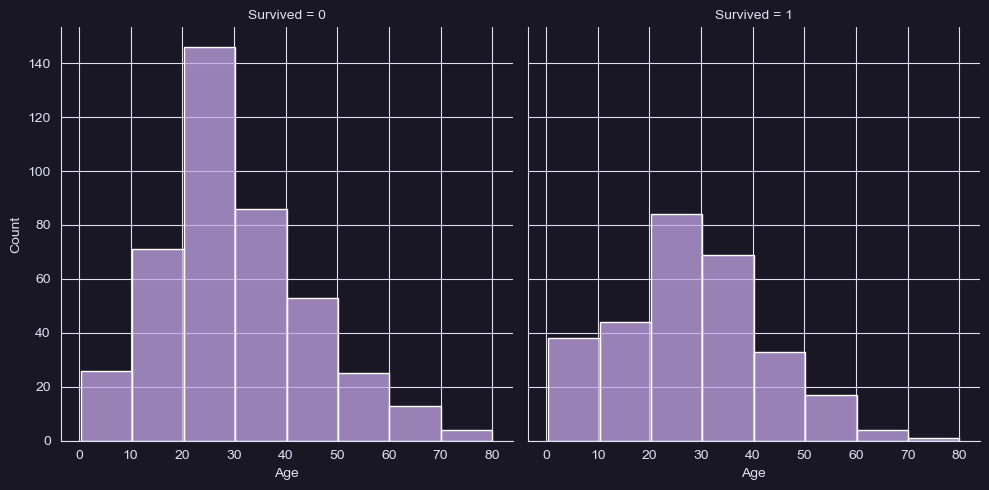

In [136]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [137]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)

In [141]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [142]:
train_df.loc[train_df['Age'] <= 19, 'Age'] = 0
train_df.loc[(train_df['Age'] > 19) & (train_df['Age'] <= 25), 'Age'] = 1
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 31.8), 'Age'] = 2
train_df.loc[(train_df['Age'] > 31.8) & (train_df['Age'] <= 41), 'Age'] = 3
train_df.loc[(train_df['Age'] > 41) & (train_df['Age'] <= 80), 'Age'] = 4
train_df.loc[train_df['Age'] > 80, 'Age'] 

test_df.loc[test_df['Age'] <= 19, 'Age'] = 0
test_df.loc[(test_df['Age'] > 19) & (test_df['Age'] <= 25), 'Age'] = 1
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 31.8), 'Age'] = 2
test_df.loc[(test_df['Age'] > 31.8) & (test_df['Age'] <= 41), 'Age'] = 3
test_df.loc[(test_df['Age'] > 41) & (test_df['Age'] <= 80), 'Age'] = 4
test_df.loc[test_df['Age'] > 80, 'Age'] 

Series([], Name: Age, dtype: float64)

In [143]:
train_df['Age']

0      1.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    0.0
888    NaN
889    2.0
890    3.0
Name: Age, Length: 891, dtype: float64

In [145]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


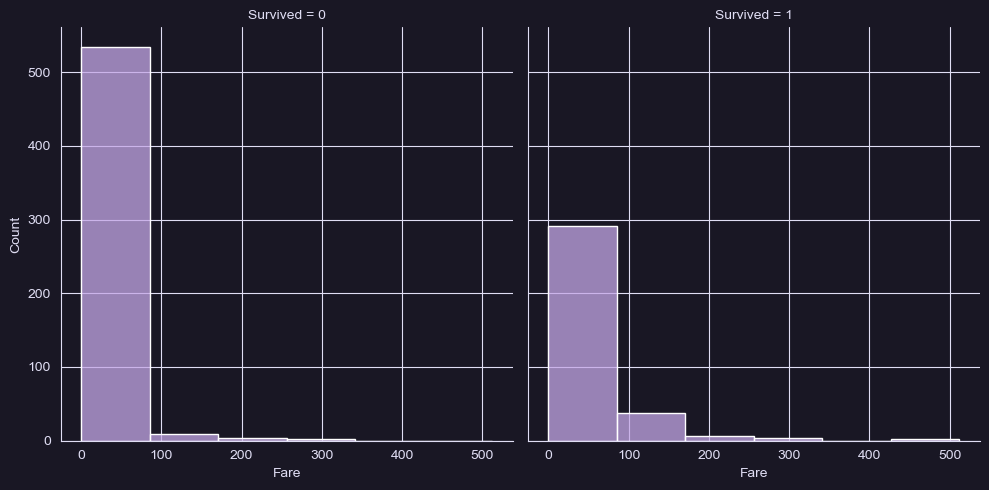

In [147]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [148]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 5)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 5)

In [152]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [153]:
train_df.loc[train_df['Fare'] <= 7.854, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.854) & (train_df['Fare'] <= 10.5), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 10.5) & (train_df['Fare'] <= 21.679), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 21.679) & (train_df['Fare'] <= 39.688), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 39.688) & (train_df['Fare'] <= 512.329), 'Fare'] = 4
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] 

test_df.loc[test_df['Fare'] <= 7.854, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.854) & (test_df['Fare'] <= 10.5), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 10.5) & (test_df['Fare'] <= 21.679), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 21.679) & (test_df['Fare'] <= 39.688), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 39.688) & (test_df['Fare'] <= 512.329), 'Fare'] = 4
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [157]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [158]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [160]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [161]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})


In [162]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [166]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

In [171]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 3)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 3)

In [172]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [173]:
train_df.loc[train_df['Name_Length'] <= 22, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 22) & (train_df['Name_Length'] <= 28), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 28) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 2
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size'] 

test_df.loc[test_df['Name_Length'] <= 22, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 22) & (test_df['Name_Length'] <= 28), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 28) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 2
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [176]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C85,C,2,Small,"(32.312, 38.0]","(39.688, 512.329]",Mrs,51,"(28.0, 82.0]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.854, 10.5]",Miss,22,"(11.999, 22.0]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,C123,S,2,Small,"(32.312, 38.0]","(39.688, 512.329]",Mrs,44,"(28.0, 82.0]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0


In [185]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [186]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [187]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [192]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [194]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [196]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [197]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [200]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [205]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [208]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [210]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [212]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [214]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [216]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [218]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [220]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [222]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,"(32.312, 38.0]","(39.688, 512.329]",Mrs,51,"(28.0, 82.0]",2.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.854, 10.5]",Miss,22,"(11.999, 22.0]",0.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,...,"(32.312, 38.0]","(39.688, 512.329]",Mrs,44,"(28.0, 82.0]",2.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0,373450,1,Blank,0


In [224]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  884 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [226]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [228]:
rosepine_colors = {
    'background': '#191724',
    'foreground': '#e0def4',
    'highlight': '#c4a7e7',
    'muted': '#eb6f92',
    'accent': '#9ccfd8',
    'secondary': '#f6c177',
    'tertiary': '#56949f'
}

# Applying rosepine color to Seaborn
custom_palette = [rosepine_colors['highlight'], rosepine_colors['muted'], rosepine_colors['accent']]
sns.set_palette(custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": rosepine_colors['background']})
plt.rcParams['axes.facecolor'] = rosepine_colors['background']
plt.rcParams['axes.edgecolor'] = rosepine_colors['foreground']
plt.rcParams['axes.labelcolor'] = rosepine_colors['foreground']
plt.rcParams['xtick.color'] = rosepine_colors['foreground']
plt.rcParams['ytick.color'] = rosepine_colors['foreground']
plt.rcParams['grid.color'] = rosepine_colors['foreground']
plt.rcParams['figure.facecolor'] = rosepine_colors['background']
plt.rcParams['text.color'] = rosepine_colors['foreground']


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\1412024652.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train_df, x='Age_Cut', hue='Survived', palette=custom_palette)


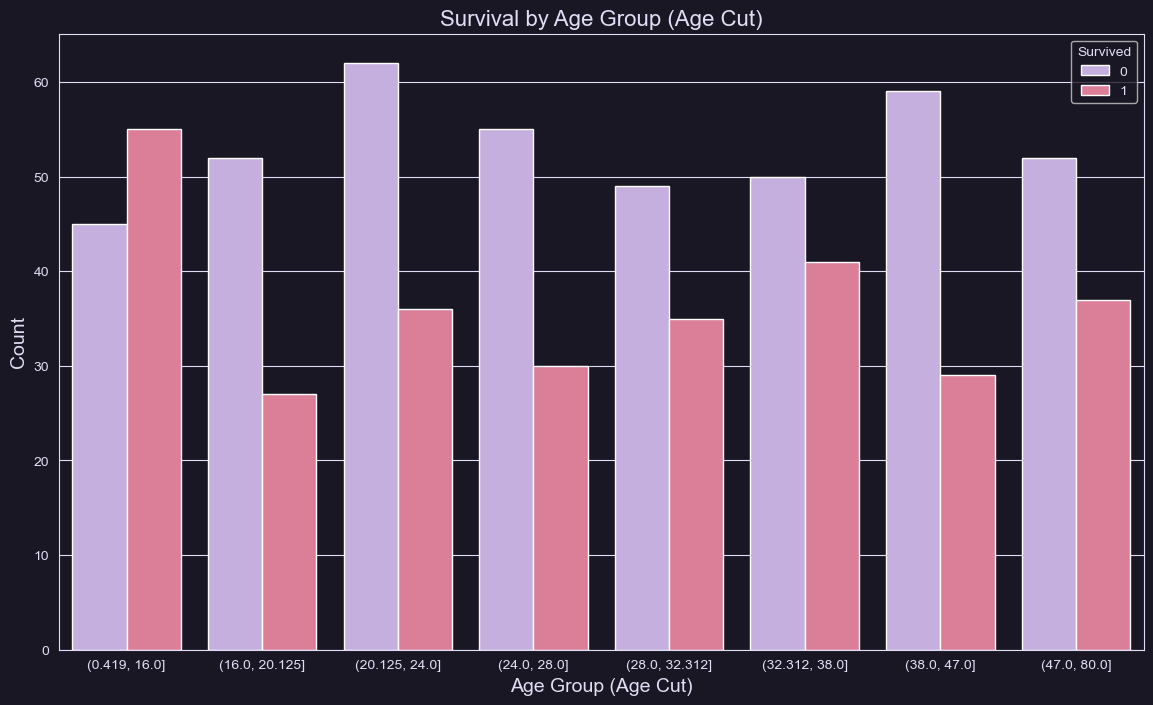

In [260]:
# Survival by Age Cut
plt.figure(figsize=(14, 8))
sns.countplot(data=train_df, x='Age_Cut', hue='Survived', palette=custom_palette)
plt.title('Survival by Age Group (Age Cut)', fontsize=16, color=rosepine_colors['foreground'])
plt.xlabel('Age Group (Age Cut)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3212574283.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Family_Size_Grouped', hue='Survived', data=train_df, palette=custom_palette)


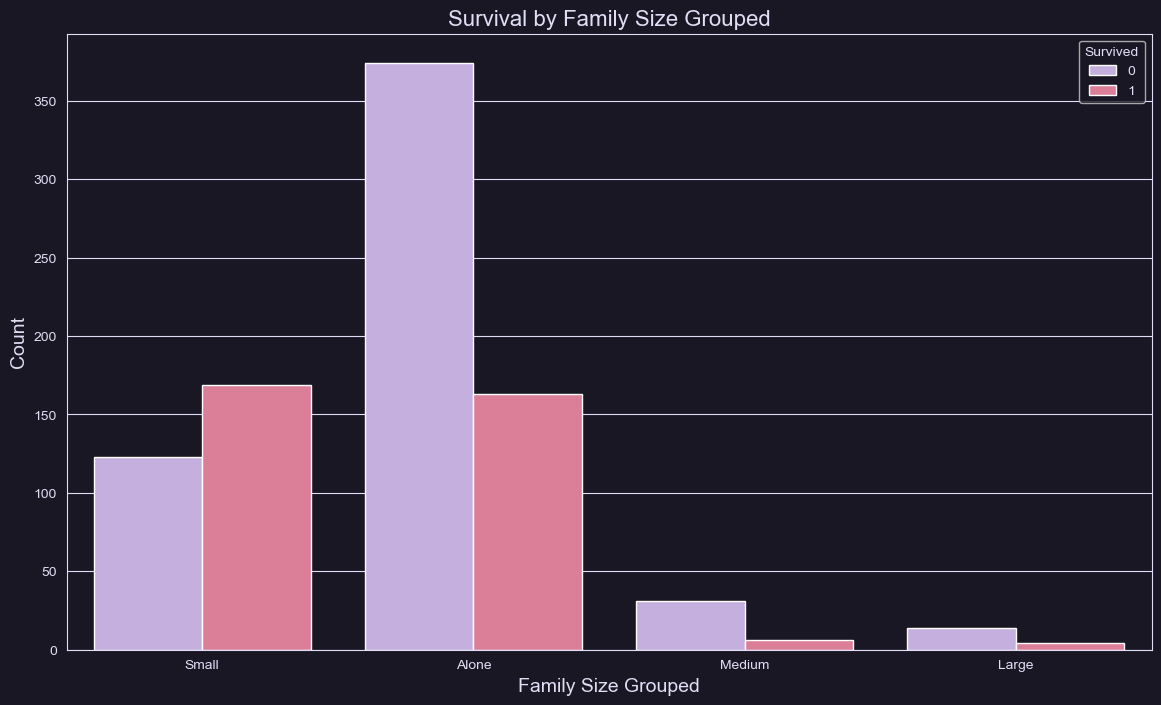

In [262]:
# Survival by Family Size Grouped
plt.figure(figsize=(14, 8))
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=train_df, palette=custom_palette)
plt.title('Survival by Family Size Grouped', fontsize=16, color=rosepine_colors['foreground'])
plt.xlabel('Family Size Grouped', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\629769478.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train_df, x='Title', hue='Survived', palette=custom_palette)


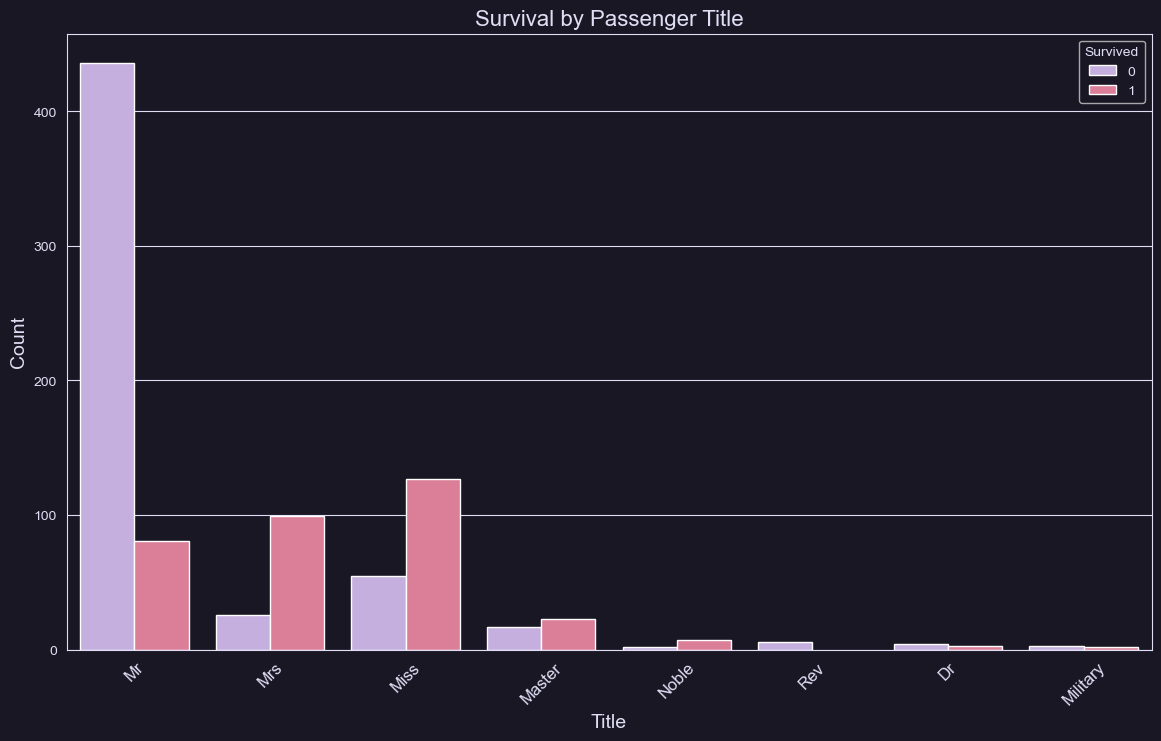

In [264]:
# Survival by Title
plt.figure(figsize=(14, 8))
sns.countplot(data=train_df, x='Title', hue='Survived', palette=custom_palette)
plt.title('Survival by Passenger Title', fontsize=16, color=rosepine_colors['foreground'])
plt.xlabel('Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3128971738.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train_df, x='Cabin_Assigned', hue='Survived', palette=custom_palette)


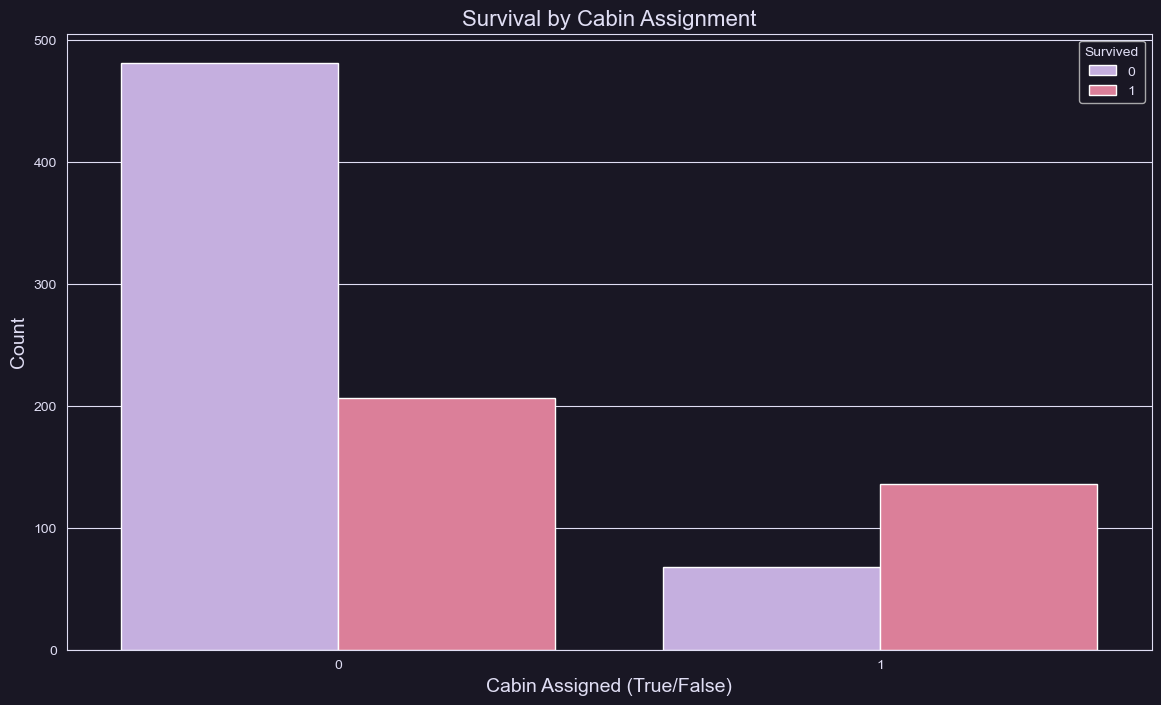

In [266]:
# Survival by Cabin Assigned
plt.figure(figsize=(14, 8))
sns.countplot(data=train_df, x='Cabin_Assigned', hue='Survived', palette=custom_palette)
plt.title('Survival by Cabin Assignment', fontsize=16, color=rosepine_colors['foreground'])
plt.xlabel('Cabin Assigned (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\1042684205.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train_df, x='Name_LengthGB', hue='Survived', palette=custom_palette)


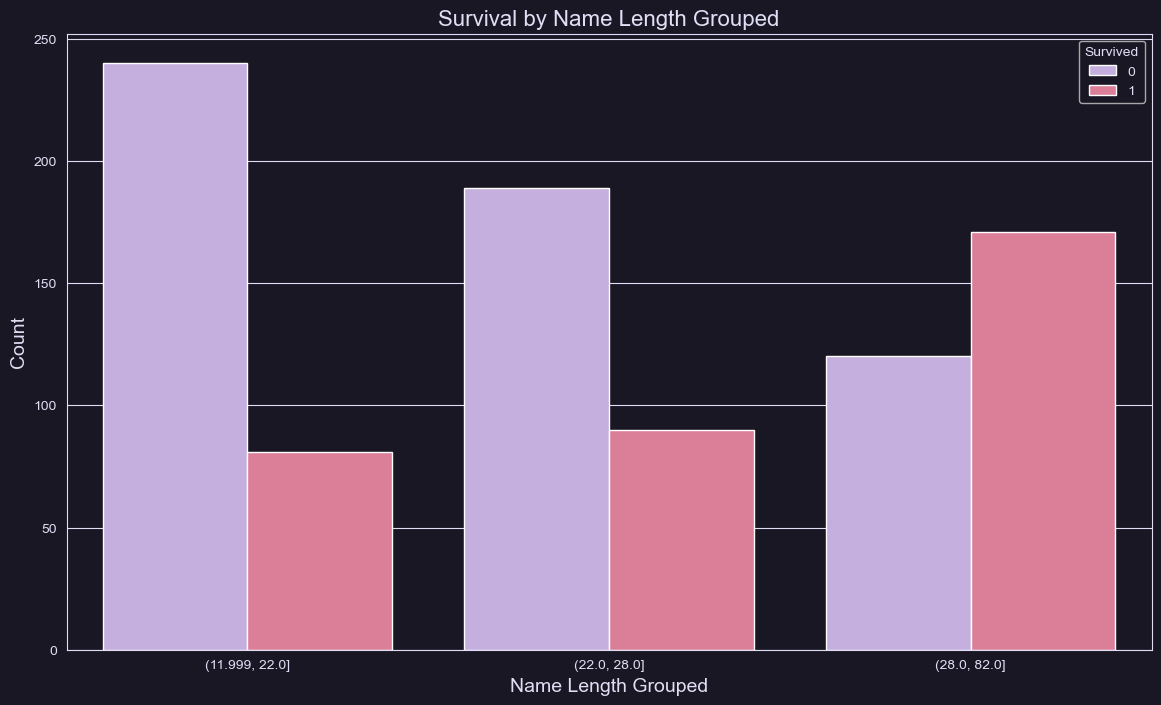

In [268]:
# Survival by Name Length Grouped
plt.figure(figsize=(14, 8))
sns.countplot(data=train_df, x='Name_LengthGB', hue='Survived', palette=custom_palette)
plt.title('Survival by Name Length Grouped', fontsize=16, color=rosepine_colors['foreground'])
plt.xlabel('Name Length Grouped', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3117503700.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.catplot(data=train_df, x='Pclass', hue='Survived', col='Cabin_Assigned', kind='count', palette=custom_palette, height=8, aspect=1.2)


<Figure size 1600x800 with 0 Axes>

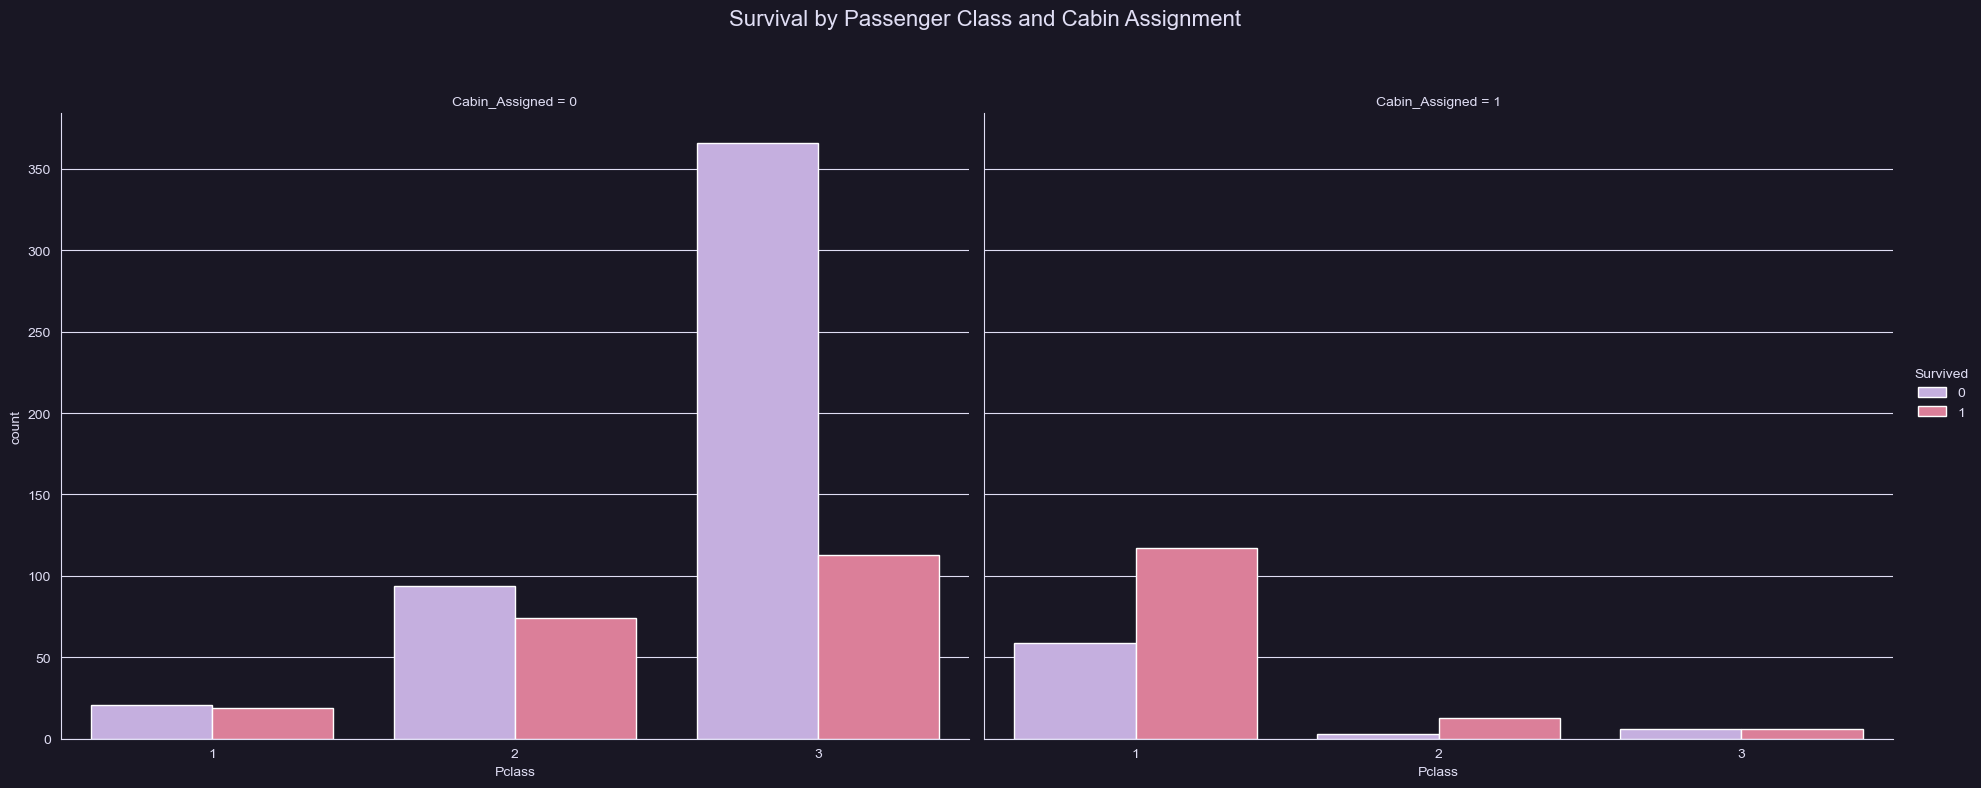

In [270]:
# Survival by Pclass and Cabin Assignment
plt.figure(figsize=(16, 8))
sns.catplot(data=train_df, x='Pclass', hue='Survived', col='Cabin_Assigned', kind='count', palette=custom_palette, height=8, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Passenger Class and Cabin Assignment', fontsize=16, color=rosepine_colors['foreground'])
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\275370688.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.catplot(data=train_df, x='Embarked', hue='Survived', col='Family_Size_Grouped', kind='count', palette=custom_palette, height=8, aspect=1.2)


<Figure size 1600x800 with 0 Axes>

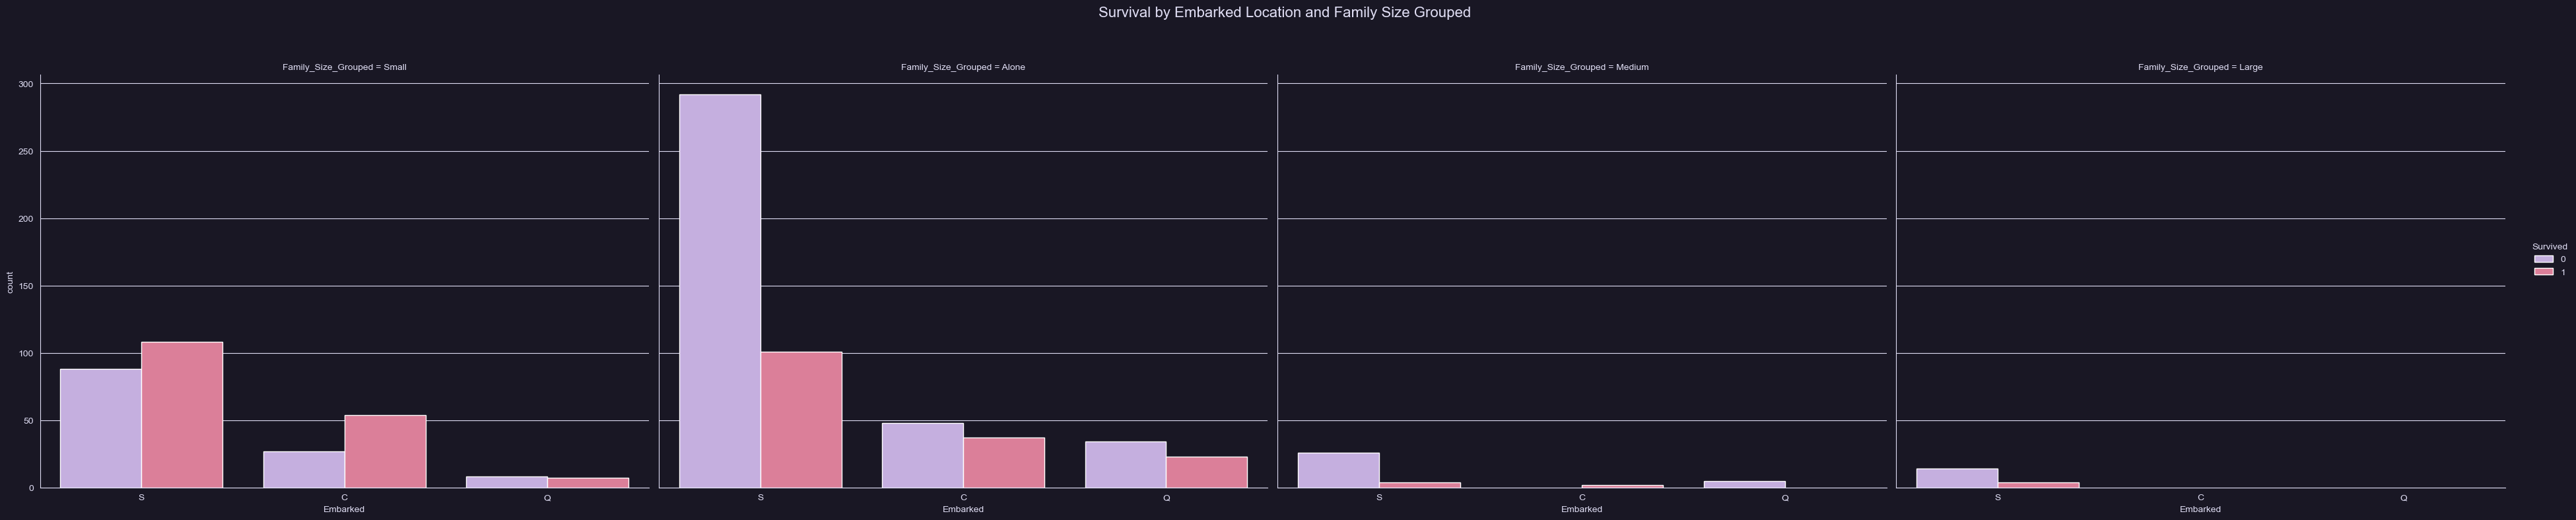

In [272]:
# Survival by Embarked Location and Family Size Grouped
plt.figure(figsize=(16, 8))
sns.catplot(data=train_df, x='Embarked', hue='Survived', col='Family_Size_Grouped', kind='count', palette=custom_palette, height=8, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Embarked Location and Family Size Grouped', fontsize=16, color=rosepine_colors['foreground'])
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\2537975102.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.catplot(data=train_df, x='Age_Cut', hue='Survived', col='Sex', kind='count', palette=custom_palette, height=8, aspect=1.2)


<Figure size 1600x800 with 0 Axes>

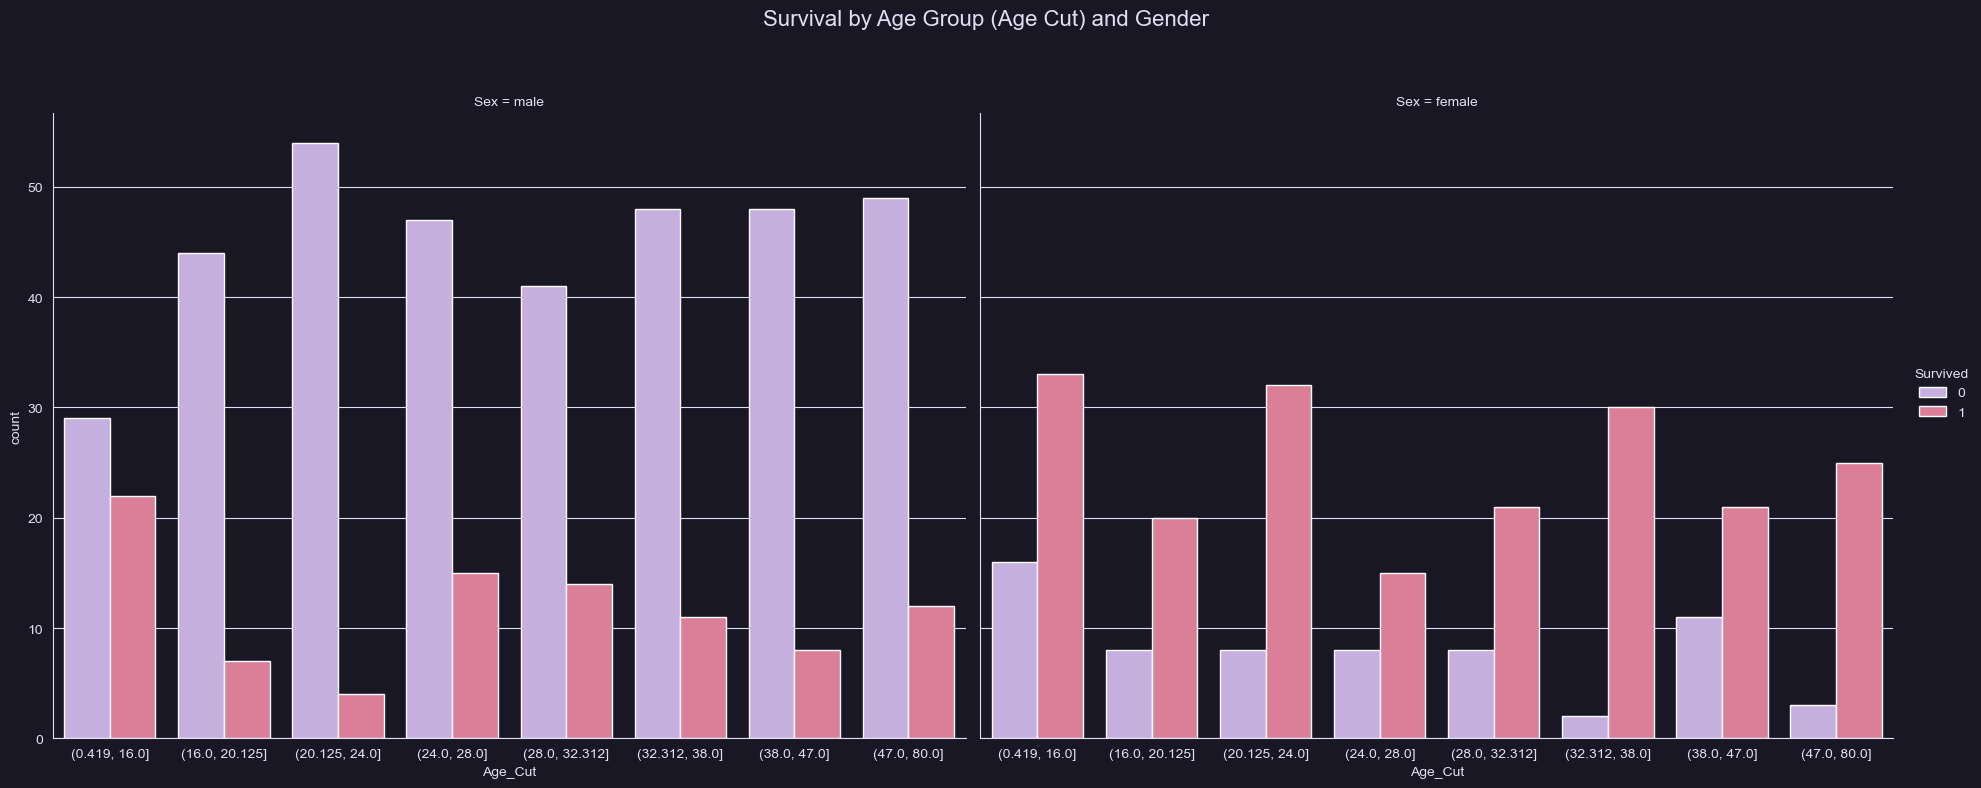

In [273]:
# Survival by Age Cut and Gender
plt.figure(figsize=(16, 8))
sns.catplot(data=train_df, x='Age_Cut', hue='Survived', col='Sex', kind='count', palette=custom_palette, height=8, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Age Group (Age Cut) and Gender', fontsize=16, color=rosepine_colors['foreground'])
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\2831674548.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.catplot(data=train_df, x='Family_Size_Grouped', hue='Survived', col='Sex', kind='count', palette=custom_palette, height=8, aspect=1.2)


<Figure size 1600x800 with 0 Axes>

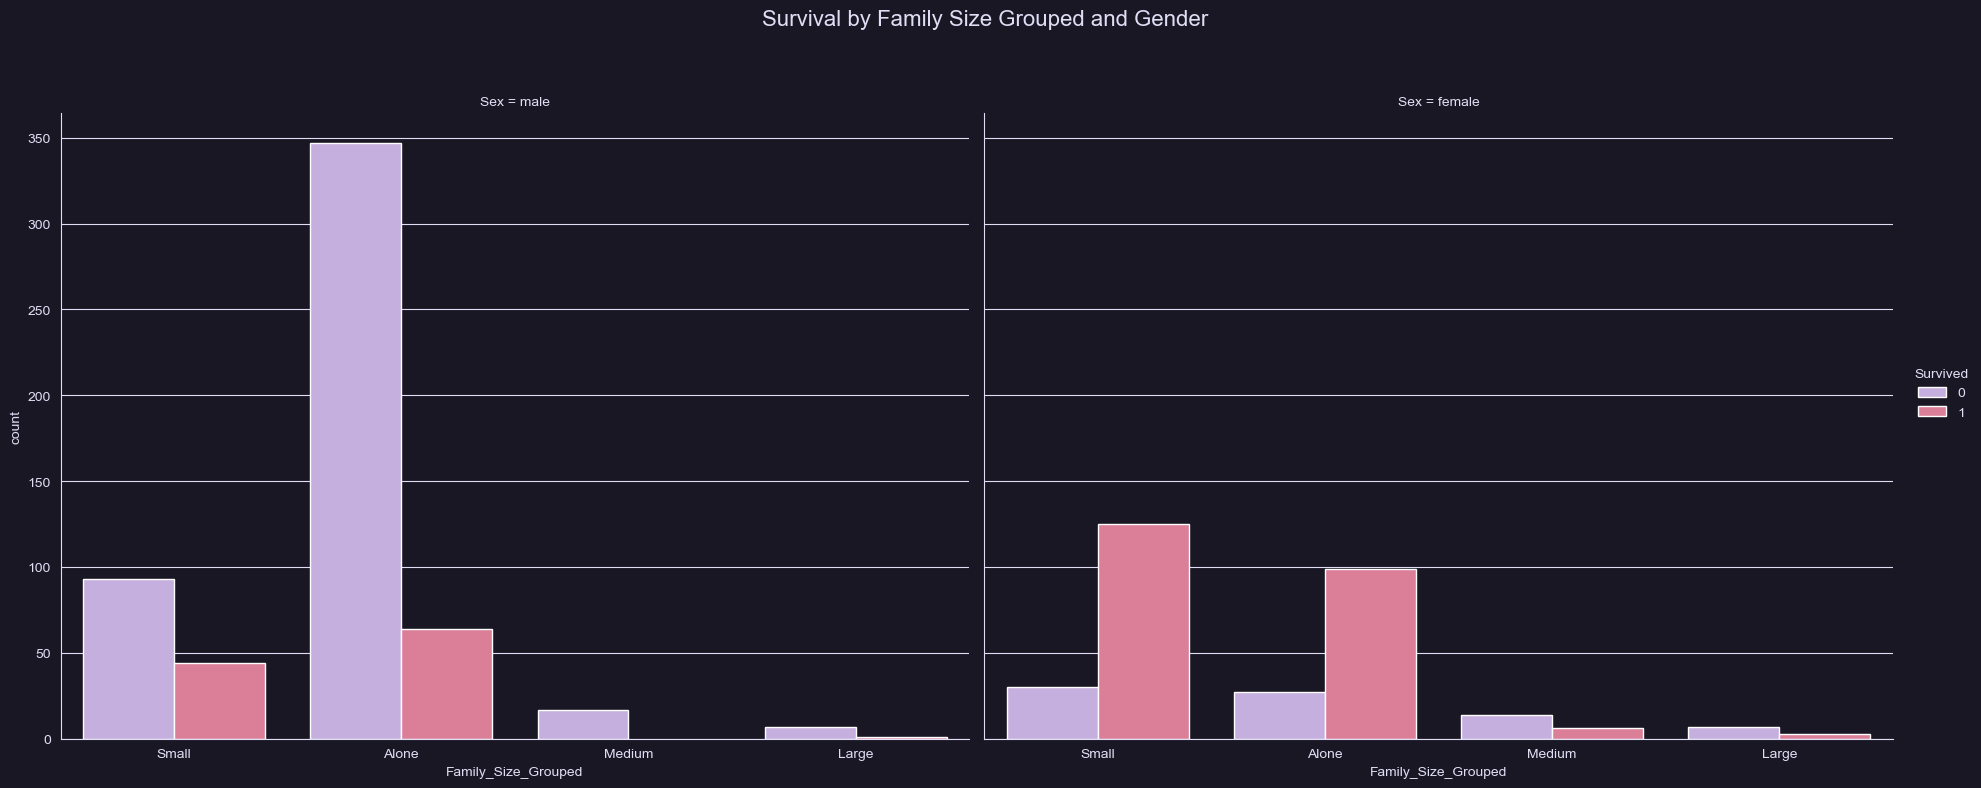

In [276]:
# Survival by Family Size Grouped and Gender
plt.figure(figsize=(16, 8))
sns.catplot(data=train_df, x='Family_Size_Grouped', hue='Survived', col='Sex', kind='count', palette=custom_palette, height=8, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Family Size Grouped and Gender', fontsize=16, color=rosepine_colors['foreground'])
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3436550498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fare_Cut', y='Survived', data=train_df, palette=custom_palette)
C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3436550498.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Fare_Cut', y='Survived', data=train_df, palette=custom_palette)


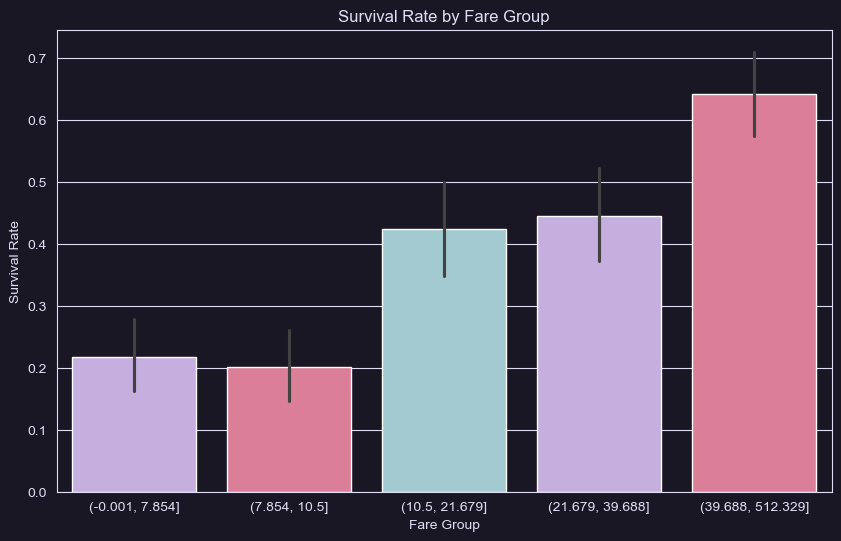

In [282]:
# Survival rate by Fare Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Fare_Cut', y='Survived', data=train_df, palette=custom_palette)
plt.title('Survival Rate by Fare Group', color=rosepine_colors['foreground'])
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3380855827.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train_df, x='Embarked', hue='Survived', palette=custom_palette)


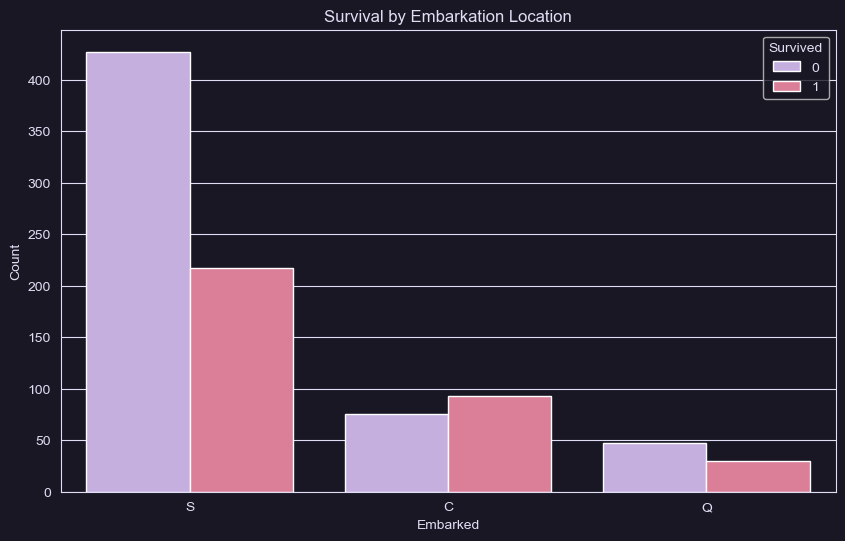

In [284]:
# Survival rate by Embarkation point
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette=custom_palette)
plt.title('Survival by Embarkation Location', color=rosepine_colors['foreground'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3708922752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Survived', data=train_df, palette=custom_palette)
C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3708922752.py:3: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Title', y='Survived', data=train_df, palette=custom_palette)


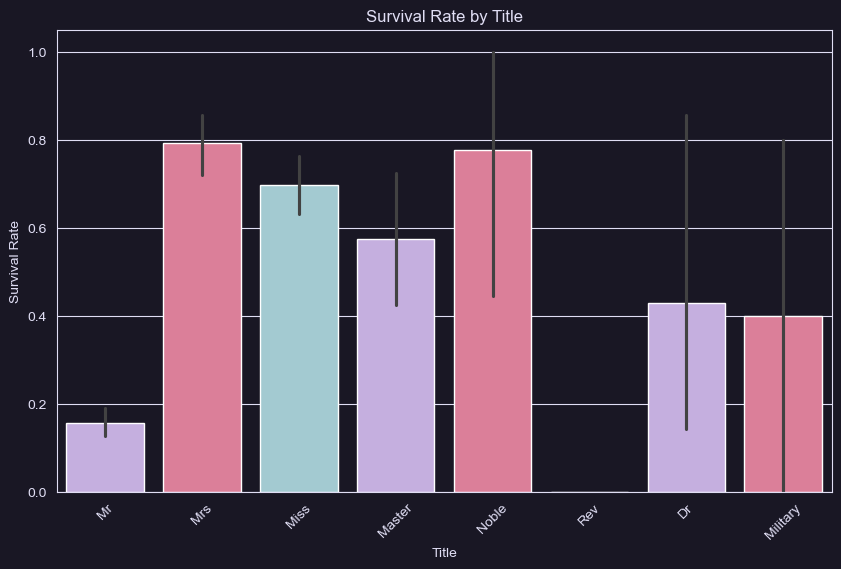

In [286]:
# Survival rate by Title
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=train_df, palette=custom_palette)
plt.title('Survival Rate by Title', color=rosepine_colors['foreground'])
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3767261332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family_Size', y='Survived', data=train_df, palette=custom_palette)
C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3767261332.py:3: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Family_Size', y='Survived', data=train_df, palette=custom_palette)


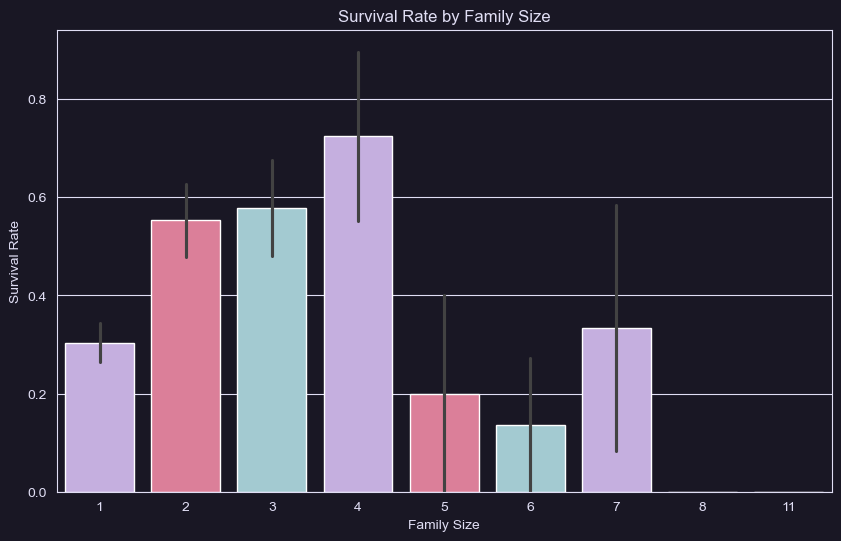

In [288]:
# Survival by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_Size', y='Survived', data=train_df, palette=custom_palette)
plt.title('Survival Rate by Family Size', color=rosepine_colors['foreground'])
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3530841514.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Family_Size_Grouped', hue='Survived', data=train_df, palette=custom_palette)


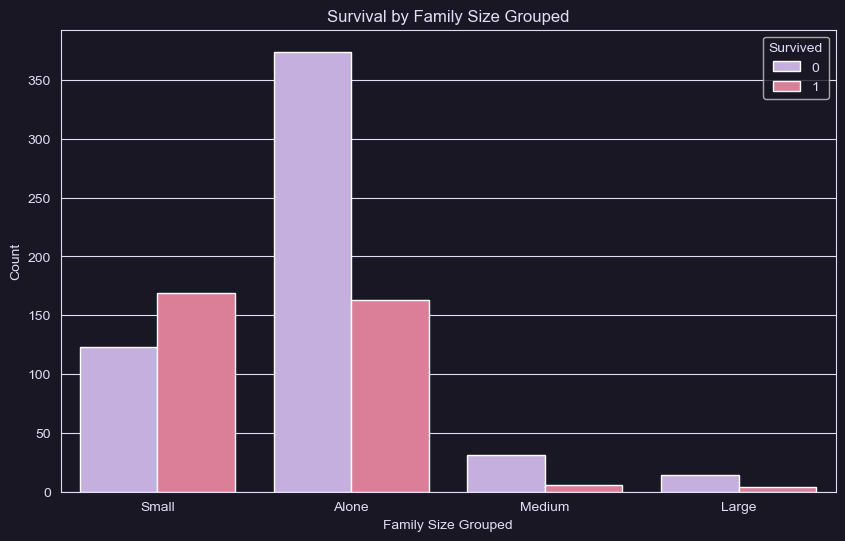

In [290]:
# Survival by Family Size Grouped
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=train_df, palette=custom_palette)
plt.title('Survival by Family Size Grouped', color=rosepine_colors['foreground'])
plt.xlabel('Family Size Grouped')
plt.ylabel('Count')
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\3594287259.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train_df, x='Sex', hue='Survived', palette=custom_palette)


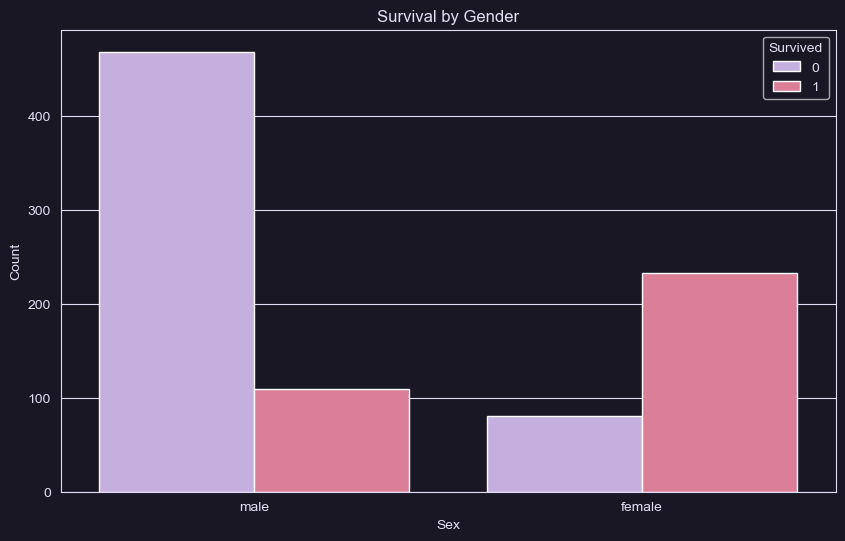

In [292]:
# Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette=custom_palette)
plt.title('Survival by Gender', color=rosepine_colors['foreground'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\4278457340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TicketNumberCounts', y='Survived', data=train_df, palette=custom_palette)
C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_20724\4278457340.py:3: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='TicketNumberCounts', y='Survived', data=train_df, palette=custom_palette)


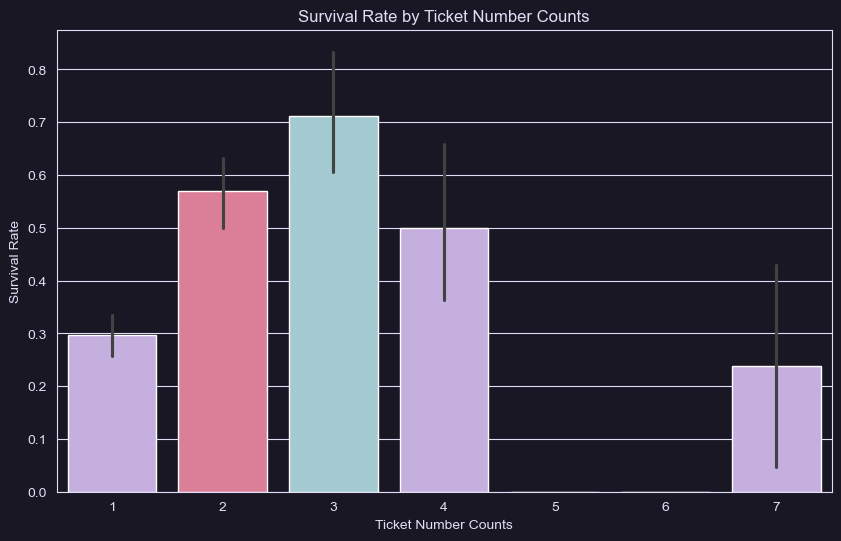

In [294]:
# Survival by Ticket Number Counts
plt.figure(figsize=(10, 6))
sns.barplot(x='TicketNumberCounts', y='Survived', data=train_df, palette=custom_palette)
plt.title('Survival Rate by Ticket Number Counts', color=rosepine_colors['foreground'])
plt.xlabel('Ticket Number Counts')
plt.ylabel('Survival Rate')
plt.show()


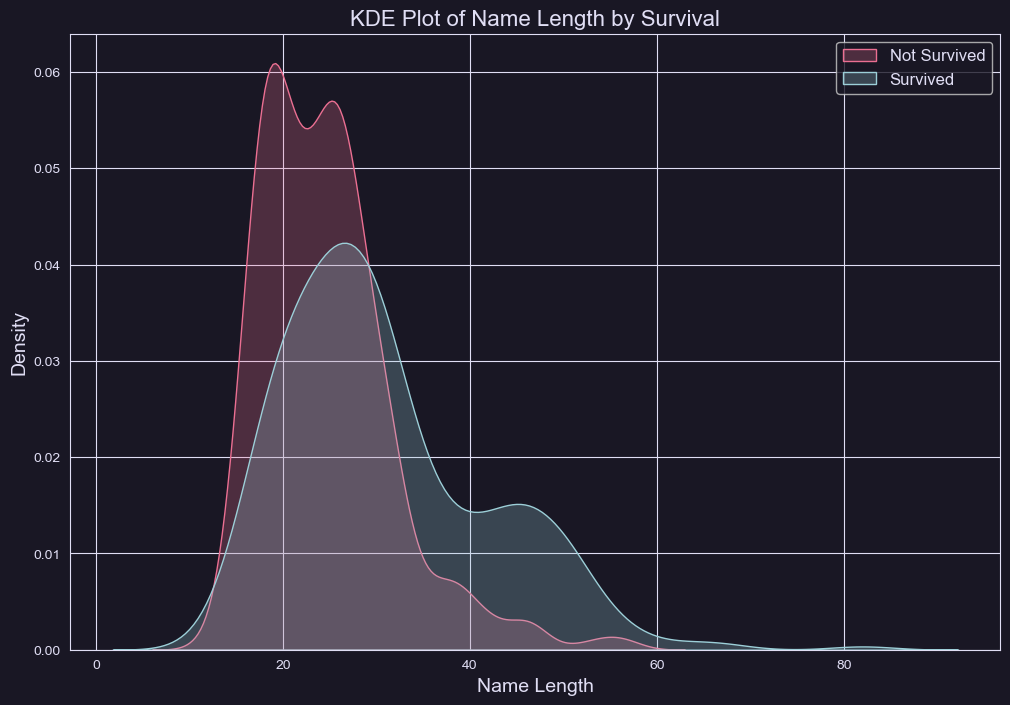

In [304]:

plt.figure(figsize=(12, 8))  # Adjusted the figure size for better visibility

# Plot for passengers who did not survive
g = sns.kdeplot(
    train_df['Name_Length'][(train_df['Survived'] == 0) & (train_df['Name_Length'].notnull())],
    color=rosepine_colors['muted'], fill=True, label='Not Survived'
)

# Plot for passengers who survived
g = sns.kdeplot(
    train_df['Name_Length'][(train_df['Survived'] == 1) & (train_df['Name_Length'].notnull())],
    color=rosepine_colors['accent'], fill=True, label='Survived'
)

# Customizing labels and title
g.set_xlabel('Name Length', fontsize=14, color=rosepine_colors['foreground'])
g.set_ylabel('Density', fontsize=14, color=rosepine_colors['foreground'])
g.set_title('KDE Plot of Name Length by Survival', fontsize=16, color=rosepine_colors['foreground'])

# Setting the legend
g.legend(['Not Survived', 'Survived'], loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [56]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_1696\623714052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\Sarvamm\AppData\Local\Temp\ipykernel_1696\623714052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [57]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [58]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

<Axes: >

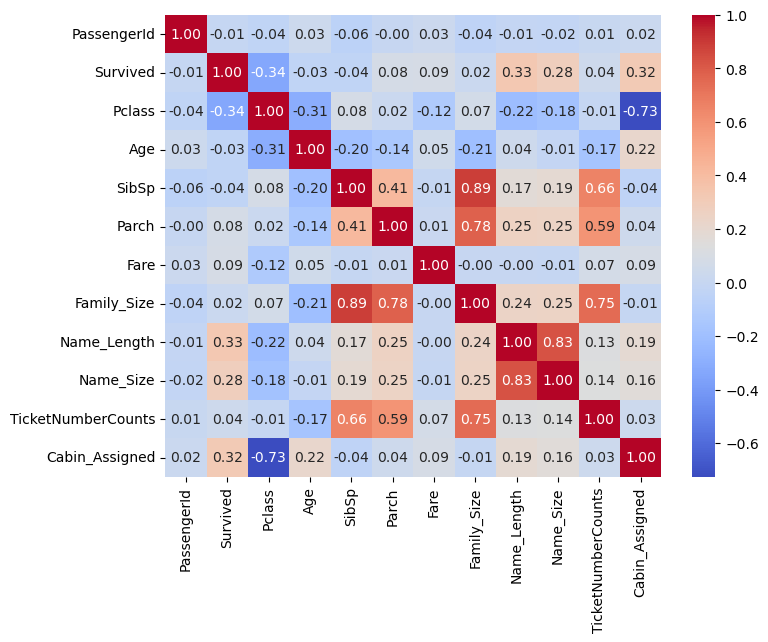

In [59]:
correlation_matrix = train_df.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [60]:
X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [62]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [63]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [64]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [65]:
rfc = RandomForestClassifier()

In [66]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [67]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [68]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [69]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
0.8272136314389836


In [70]:
dtc = DecisionTreeClassifier()

In [71]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [72]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [73]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [74]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.8075642667191962


In [75]:
knn = KNeighborsClassifier()

In [76]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [77]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [78]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [79]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8047572146163695


In [80]:
svc = SVC(probability=True)

In [81]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [82]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [83]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [84]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8005614104205654


In [85]:
lr = LogisticRegression()

In [86]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [87]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [88]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [89]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8047867625332413


In [90]:
gnb = GaussianNB()

In [91]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [92]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [93]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [94]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7654781837880429


In [95]:
xg = XGBClassifier()

In [96]:
param_grid = {
     'booster': ['gbtree', 'gblinear','dart'],
}

In [97]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [98]:
pipefinalxg= make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart']}))])

In [99]:
print(CV_xg.best_params_)
print(CV_xg.best_score_)

{'booster': 'gblinear'}
0.8019600118191667


In [100]:
abc = AdaBoostClassifier()

In [101]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)  
svc_2 = SVC(probability=True, C=10, kernel='rbf') 
lr_2 = LogisticRegression(C=0.1) 
lr_3 = LogisticRegression(C=0.2) 
lr_4 = LogisticRegression(C=0.05) 

In [102]:
param_grid = {
    'estimator': [dtc_2, svc_2, lr_2], 
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]  
}

In [103]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [104]:
etc = ExtraTreesClassifier()

In [105]:
param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
}

In [106]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [107]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=ExtraTreesClassifier(),
                              param_grid={'max_features': [1, 3, 10],
                                          'min_samples_leaf': [1, 3, 10],
                                          'min_samples_split': [2, 3, 10],
                                          'n_estimators': [100, 300]}))])

In [108]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

{'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
0.8132276174529695


In [109]:
GBC = GradientBoostingClassifier()

In [110]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [111]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [112]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.3, 0.6, 1.0],
                                          'max_depth': [8, 10, 12],
                                          'max_features': [0.1, 0.3, 0.5],
                                          'min_samples_leaf': [50, 100, 120,
                                                               150],
                                          'n_estimators': [300, 400, 500]}))])

In [113]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'learning_rate': 0.6, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 400}
0.8286713286713286


In [114]:
vc1 = VotingClassifier([('gbc', CV_gbc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

In [124]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

In [126]:
pipefinalcv1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('gbc',
                                               GradientBoostingClassifier(learning_rate=0.6,
                                                                          max_depth=12,
                                                                          max_features=0.3,
                                                                          min_samples_leaf=100,
                                                                          n_estimators=400)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=3,
                                                                    min_samples_leaf=3)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [130]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalxg.predict(X_test)
Y_pred8 = pipefinalabc.predict(X_test)
Y_pred9 = pipefinaletc.predict(X_test)
Y_pred10 = pipefinalgbc.predict(X_test)
Y_pred11 = pipefinalcv1.predict(X_test)
Y_pred12 = pipefinalcv2.predict(X_test)

NameError: name 'pipefinalabc' is not defined

In [142]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred6
})

submission7 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred7
})


In [144]:
submission.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic1.csv', index=False)
submission2.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic2.csv', index=False)
submission3.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic3.csv', index=False)
submission4.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic4.csv', index=False)
submission5.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic5.csv', index=False)
submission6.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic6.csv', index=False)
submission7.to_csv('C:/Users/Sarvamm/Documents/Projects/Titanic/titanic7.csv', index=False)

